##Reading from directories and preprocessing stage

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive/"

 360TS_Setup_Mini.exe		       ex1data1.txt		   Sepehr_kmeans
 AP1401-2-HW5-main_Sepehr9923004.zip   movies_complete.csv	   tumor_classification
'Colab Notebooks'		      'sanaati (2).zip'
 Crop_MRI_data			       Scanned_20180528-1528.pdf


In [4]:
image_directory  = "/content/drive/My Drive/tumor_classification"

In [5]:
classes = !ls "/content/drive/My Drive/tumor_classification"
print(classes[0])

glioma	meningioma  pituitary_tumor


In [6]:
#create classes ------
classes = classes[0].split()
print(classes)

['glioma', 'meningioma', 'pituitary_tumor']


In [7]:
glioma = !ls "/content/drive/My Drive/tumor_classification/glioma"
meningioma = !ls "/content/drive/My Drive/tumor_classification/meningioma"
pituitary_tumor = !ls "/content/drive/My Drive/tumor_classification/pituitary_tumor"

In [8]:
print(glioma)

['100416_1350.png     MR026175C_1993.png\tMR037458C_2726.png  MR048994_2434.png\tMR051461_2917.png', '100416_1351.png     MR026175C_1994.png\tMR037458C_2727.png  MR048994_2435.png\tMR051461_2918.png', '100416_1352.png     MR026175C_1995.png\tMR037458C_2728.png  MR048994_2436.png\tMR051461_2919.png', '100416_1353.png     MR026175C_1996.png\tMR037458C_2729.png  MR048994_2437.png\tMR051461_2920.png', '100820_122.png\t    MR026175C_2325.png\tMR038469_2145.png   MR048994_2438.png\tMR051461_2921.png', '100820_124.png\t    MR026175C_2326.png\tMR038469_2146.png   MR048994_2439.png\tMR051461_2922.png', '100820_1354.png     MR026175C_2327.png\tMR038469_2147.png   MR048994_2440.png\tMR051461_2923.png', '100820_1355.png     MR026175C_2328.png\tMR038469_2148.png   MR048994_2845.png\tMR051461B_2011.png', '100820_1356.png     MR026175C_2329.png\tMR038469_2149.png   MR048994_2846.png\tMR051461B_2012.png', '100820_1357.png     MR026175C_2330.png\tMR038469_2150.png   MR048994_2847.png\tMR051461B_2013.pn

In [9]:
contents = []
directory_contents = {}
#glioma
for content in glioma:
  c = content.split()
  contents.extend(c)
directory_contents['glioma'] = contents
contents = []

#meningioma
for content in meningioma:
  c = content.split()
  contents.extend(c)
directory_contents['meningioma'] = contents
contents = []

#glioma
for content in pituitary_tumor:
  c = content.split()
  contents.extend(c)
directory_contents['pituitary_tumor'] = contents
contents = []

In [10]:
print(len(directory_contents['pituitary_tumor']))
print(len(directory_contents['glioma']))
print(len(directory_contents['meningioma']))

930
1426
708


##Presenting the MRI images

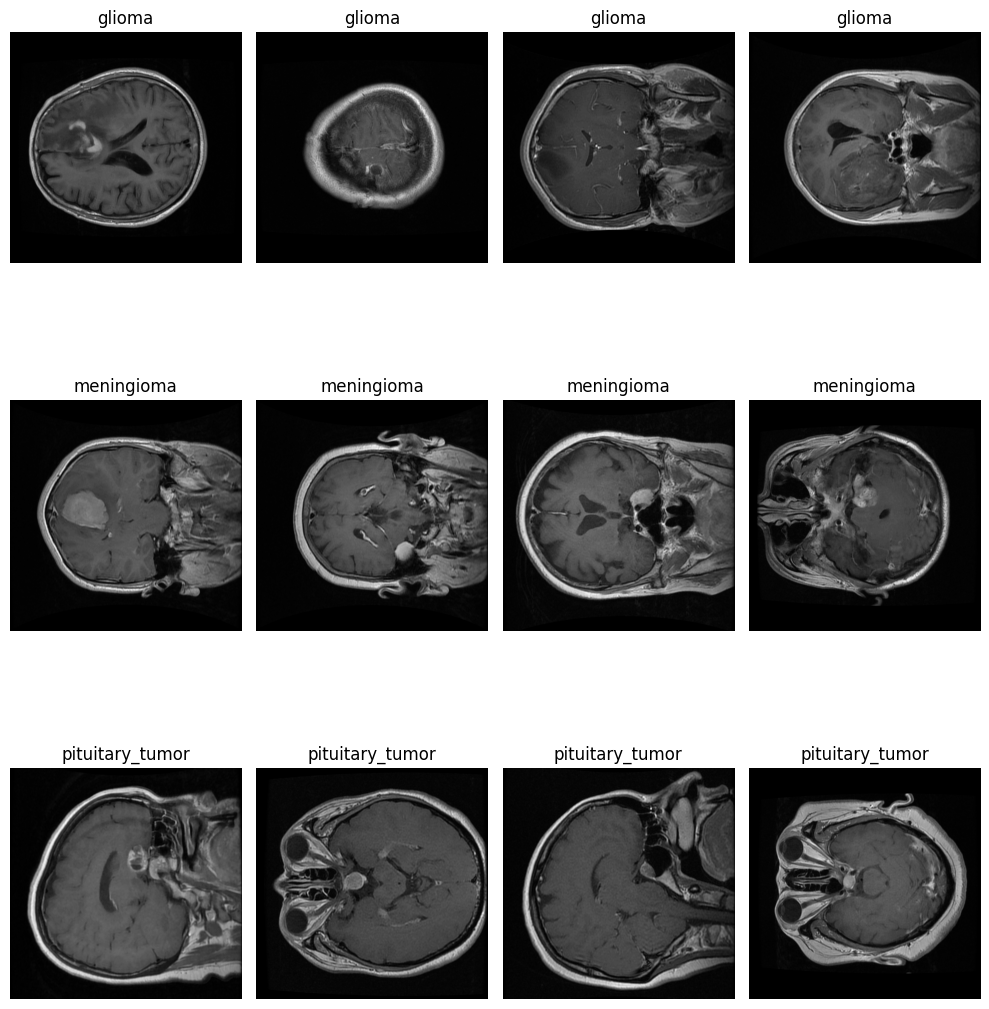

In [11]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(3, 4, figsize=(10, 12))
for c in classes:
  random.shuffle(directory_contents[c])
  photos = directory_contents[c][:4]
  for i in range (4):
    path =  image_directory + "/" + c + "/" + photos[i]
    image = mpimg.imread(path)
    if c == "glioma":
      axs[0,i].imshow(image, cmap='gray')
      axs[0,i].axis('off')
      axs[0,i].set_title(c)
    if c == "meningioma":
      axs[1,i].imshow(image, cmap='gray')
      axs[1,i].axis('off')
      axs[1,i].set_title(c)
    if c == "pituitary_tumor":
      axs[2,i].imshow(image, cmap='gray')
      axs[2,i].axis('off')
      axs[2,i].set_title(c)
plt.tight_layout()
plt.show()


##Creating test and train directories and data for the model

In [12]:
import os
import random
import shutil
output_dir = "/content/tumor_dataset_for_model"

# Create train and test directories
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

for class_name in classes:
    # List images
    class_path = os.path.join(image_directory, class_name)
    images = os.listdir(class_path)

    # Shuffle and select 700 images
    random.shuffle(images)
    selected_images = images[:700]

    # Split into train (500) and test (200)
    train_images = selected_images[:500]
    test_images = selected_images[500:]

    # Copy files to train/test directories
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

In [13]:
x = !ls "/content/tumor_dataset_for_model/train/glioma"

print(x)

['100416_1350.png     MR029209E_2660.png\tMR039473B_2782.png  MR049019G_2138.png\tMR051586_2924.png', '100416_1353.png     MR029209E_2661.png\tMR039473B_2783.png  MR049019G_2139.png\tMR051586_2925.png', '100820_1355.png     MR029209E_2734.png\tMR039473B_2785.png  MR049019G_2676.png\tMR051586_2929.png', '100820_1356.png     MR029209E_3028.png\tMR040240_2197.png   MR049019G_2744.png\tMR051644_2016.png', '100820_1357.png     MR029209G_2215.png\tMR040240_2199.png   MR049104_1879.png\tMR051644_2023.png', '100820_1359.png     MR029209G_2216.png\tMR040240_2201.png   MR049104_2243.png\tMR051644_2024.png', '100820_720.png\t    MR029209G_2222.png\tMR040240_2202.png   MR049104_2245.png\tMR051644_2026.png', '100820_723.png\t    MR029209G_2802.png\tMR040240_2203.png   MR049104_2853.png\tMR051644_2028.png', '100820_724.png\t    MR029209I_2394.png\tMR040240_2445.png   MR049104_2855.png\tMR051644_2029.png', '100820_725.png\t    MR029209I_2397.png\tMR040240_2787.png   MR049104_2856.png\tMR051644_2554.p

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

train_datagen = ImageDataGenerator(rescale=1.0/255)

test_datagen = ImageDataGenerator(rescale=1.0/255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64,64),
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (64,64),
    class_mode='categorical'
)


Found 1500 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


##Building up the deep learning models

In [15]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,968,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,969,283 (7.51 MB)

 Trainable params: 1,969,283 (7.51 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,811 (1.57 MB)

 Trainable params: 411,811 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,379 (364.76 KB)

 Trainable params: 93,379 (364.76 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       1,968,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,973,443 (7.53 MB)

 Trainable params: 1,973,443 (7.53 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │       1,968,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,977,603 (7.54 MB)

 Trainable params: 1,977,603 (7.54 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model6 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 841,795 (3.21 MB)

 Trainable params: 841,795 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model7 = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model7.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 62, 62, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 29, 29, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,757,059 (6.70 MB)

 Trainable params: 1,757,059 (6.70 MB)

 Non-trainable params: 0 (0.00 B)

##Training the model

In [22]:
# Compile the model
model1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# Callbacks
early_stopping1 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint1 = ModelCheckpoint('model1.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

In [24]:
history = model1.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping1, model_checkpoint1]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.5124 - loss: 0.9945
Epoch 1: val_loss improved from inf to 0.81002, saving model to model1.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - accuracy: 0.5231 - loss: 0.9793 - val_accuracy: 0.5817 - val_loss: 0.8100
Epoch 2/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6389 - loss: 0.7603
Epoch 2: val_loss improved from 0.81002 to 0.70351, saving model to model1.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - accuracy: 0.6408 - loss: 0.7551 - val_accuracy: 0.6633 - val_loss: 0.7035
Epoch 3/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.6815 - loss: 0.6747
Epoch 3: val_loss improved from 0.70351 to 0.65072, saving model to model1.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - accuracy: 0.6816 - loss: 0.6735 - val_accuracy: 0.7017 - val_loss: 0.6507
Epoch 4/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.7223 - loss: 0.6111
Epoch 4: val_loss improved from 0.65072 to 0.63316, saving model to model1.

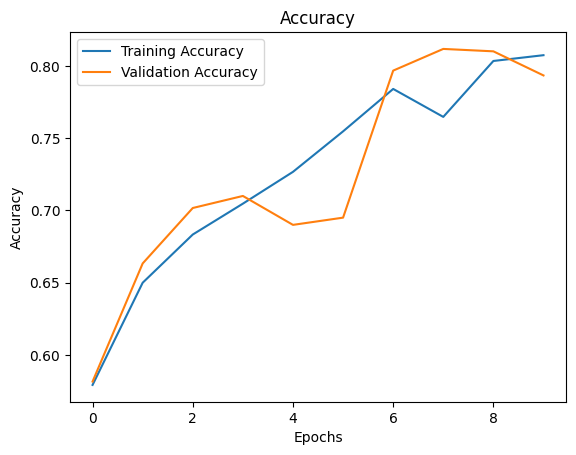

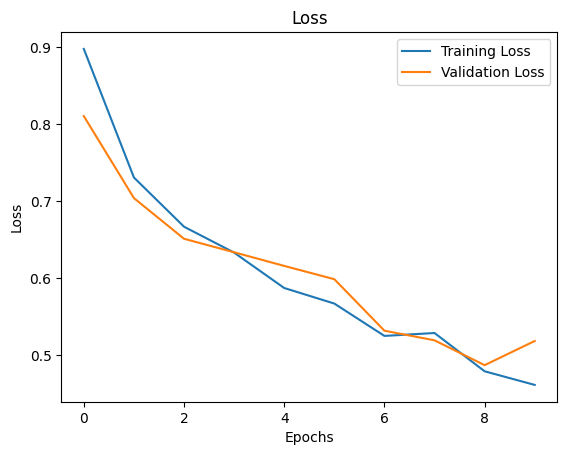

In [25]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model1.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.8151 - loss: 0.4668
Test Accuracy: 0.81, Test Loss: 0.49


In [28]:
# Compile the model
model2.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# Callbacks
early_stopping2 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint2 = ModelCheckpoint('model2.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

In [30]:
history = model2.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping2, model_checkpoint2]
)

Epoch 1/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.4440 - loss: 1.0596
Epoch 1: val_loss improved from inf to 0.90592, saving model to model2.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 231ms/step - accuracy: 0.4539 - loss: 1.0508 - val_accuracy: 0.5533 - val_loss: 0.9059
Epoch 2/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.5741 - loss: 0.8692
Epoch 2: val_loss improved from 0.90592 to 0.77131, saving model to model2.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.5778 - loss: 0.8597 - val_accuracy: 0.5917 - val_loss: 0.7713
Epoch 3/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6174 - loss: 0.7691
Epoch 3: val_loss improved from 0.77131 to 0.75099, saving model to model2.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - accuracy: 0.6181 - loss: 0.7650 - val_accuracy: 0.5917 - val_loss: 0.7510
Epoch 4/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.6616 - loss: 0.7040
Epoch 4: val_loss improved from 0.75099 to 0.68388, saving model

In [31]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model2.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.7580 - loss: 0.5717
Test Accuracy: 0.77, Test Loss: 0.57


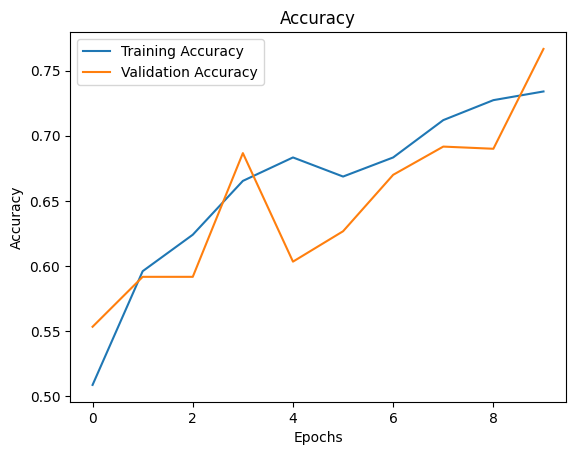

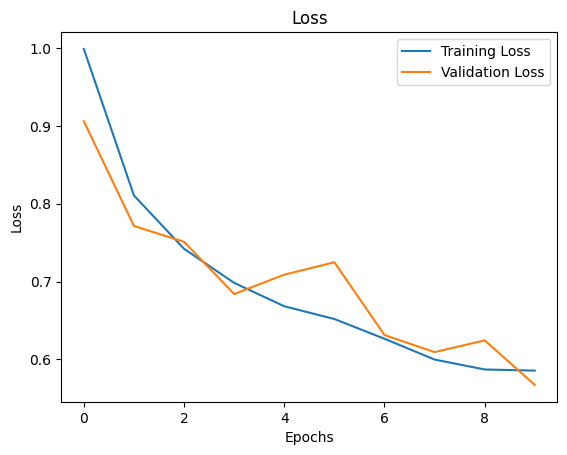

In [32]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
# Compile the model
model4.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping4 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint4 = ModelCheckpoint('model4.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history4 = model4.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping4, model_checkpoint4]
)


Epoch 1/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.5161 - loss: 0.9442
Epoch 1: val_loss improved from inf to 0.74787, saving model to model4.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 229ms/step - accuracy: 0.5256 - loss: 0.9279 - val_accuracy: 0.6300 - val_loss: 0.7479
Epoch 2/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.6594 - loss: 0.7121
Epoch 2: val_loss improved from 0.74787 to 0.67249, saving model to model4.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.6582 - loss: 0.7115 - val_accuracy: 0.7000 - val_loss: 0.6725
Epoch 3/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.6908 - loss: 0.6299
Epoch 3: val_loss did not improve from 0.67249
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.6900 - loss: 0.6315 - val_accuracy: 0.6033 - val_loss: 0.7011
Epoch 4/10
40/47 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.7028 - loss: 0.6577
Epoch 4: val_loss improved from 0.67249 to 0.60572, saving model to model4.keras
47/47 ━━━━━━━━━━━━

In [39]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model4.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.7424 - loss: 0.4952
Test Accuracy: 0.76, Test Loss: 0.50


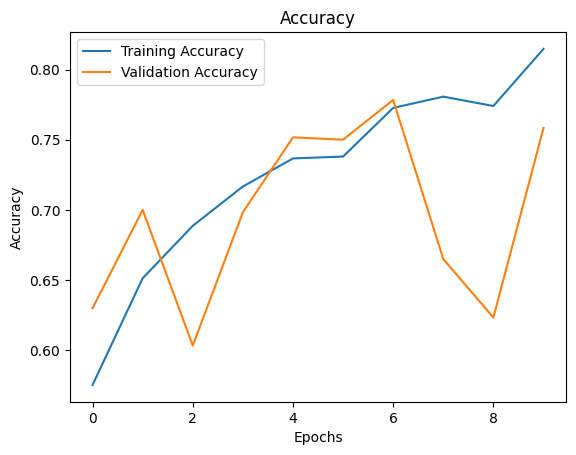

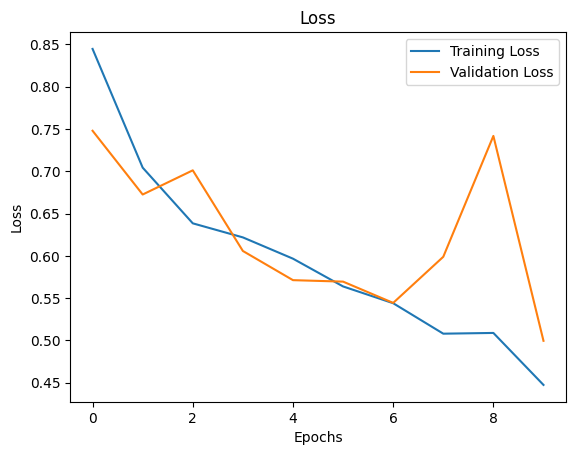

In [40]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()